In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from datetime import datetime

In [71]:
weights_df = pd.read_csv("../1. Inspect, Clean and Validate Dataset/CleanedData/Cleaned_WeightsAndCalories_IncEstimated.csv")

In [72]:
# weights_df["Date"] = pd.to_datetime(weights_df["Date"], format="%d/%m/%Y")

In [73]:
weights_df["Body Fat, kg"] = weights_df["Weight, kg"] * weights_df["Body Fat Percentage"] / 100
weights_df["Muscle Mass, kg"] = weights_df["Weight, kg"] * weights_df["Muscle Percentage"] / 100
weights_df["Visceral Fat, kg"] = weights_df["Weight, kg"] * weights_df["Visceral Fat Percentage"] / 100

KG_TO_LBS = 2.2046226218
weights_df["Weight, lbs"] = weights_df["Weight, kg"] * KG_TO_LBS
weights_df["Muscle Mass, lbs"] = weights_df["Muscle Mass, kg"] * KG_TO_LBS
weights_df["Body Fat, lbs"] = weights_df["Body Fat, kg"] * KG_TO_LBS
weights_df["Lean Weight - Body Fat, lbs"] = (weights_df["Muscle Mass, lbs"]-weights_df["Body Fat, lbs"])

In [74]:
weights_df["Body Fat, kg (7d Average)"] = weights_df["Body Fat, kg"].rolling(7).mean()
weights_df["Body Fat, lbs (7d Average)"] = weights_df["Body Fat, lbs"].rolling(7).mean()

weights_df["Muscle Mass, kg (7d Average)"] = weights_df["Muscle Mass, kg"].rolling(7).mean()
weights_df["Muscle Mass, lbs (7d Average)"] = weights_df["Muscle Mass, lbs"].rolling(7).mean()

weights_df["Lean Weight - Body Fat, lbs (7d Average)"] = weights_df["Lean Weight - Body Fat, lbs"].rolling(7).mean()

weights_df["Weight, kg (7d Average)"] = weights_df["Weight, kg"].rolling(7).mean()


[Text(0.0, 0, '17/12/2020'),
 Text(75.0, 0, '02/03/2021'),
 Text(150.0, 0, '16/05/2021'),
 Text(225.0, 0, '30/07/2021'),
 Text(300.0, 0, '13/10/2021'),
 Text(375.0, 0, '27/12/2021'),
 Text(450.0, 0, '12/03/2022'),
 Text(525.0, 0, '10/07/2022'),
 Text(600.0, 0, '15/07/2023'),
 Text(675.0, 0, '28/09/2023'),
 Text(750.0, 0, '12/12/2023'),
 Text(825.0, 0, '25/02/2024'),
 Text(900.0, 0, '10/05/2024'),
 Text(975.0, 0, '24/07/2024'),
 Text(1050.0, 0, '07/10/2024'),
 Text(1125.0, 0, '21/12/2024'),
 Text(1200.0, 0, '06/03/2025'),
 Text(1275.0, 0, '20/05/2025'),
 Text(1350.0, 0, '03/08/2025')]

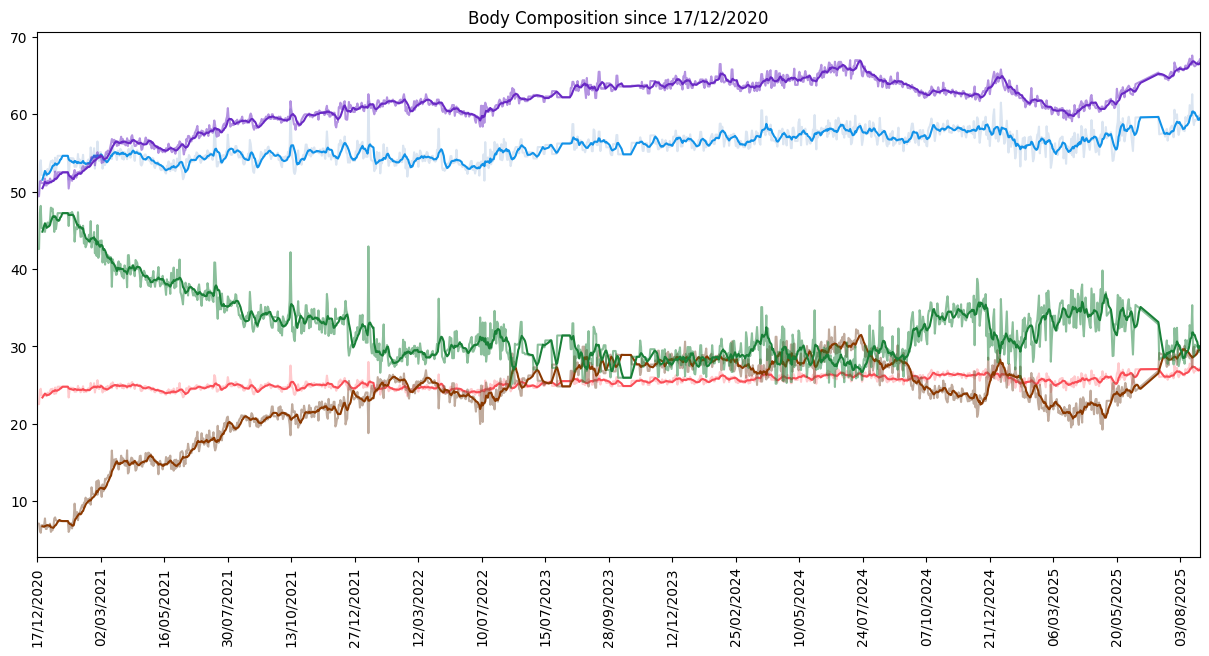

In [75]:
figure = plt.figure(figsize=(15, 15))
ax = figure.add_subplot(2, 1, 1)

x_values = weights_df["Date"]

ax.margins(x=0)

ax.plot(x_values, weights_df["Muscle Mass, lbs"], color="#b8cce4b2", alpha=0.5, label="Muscle Mass, lbs")
ax.plot(x_values, weights_df["Muscle Mass, lbs (7d Average)"], color="#1192e8", label="Muscle Mass, lbs (7d Average)")

ax.plot(x_values, weights_df["Muscle Mass, kg"], color="#ff979cff", alpha=0.5, label="Muscle Mass, kg")
ax.plot(x_values, weights_df["Muscle Mass, kg (7d Average)"], color="#fa4d56", label="Muscle Mass, kg (7d Average)")

ax.plot(x_values, weights_df["Body Fat, lbs"], color="#83593d", alpha=0.5, label="Body Fat, lbs")
ax.plot(x_values, weights_df["Body Fat, lbs (7d Average)"], color="#8a3800", label="Body Fat, lbs (7d Average)")

ax.plot(x_values, weights_df["Lean Weight - Body Fat, lbs"], color="#1980387F", alpha=0.5, label="Lean Weight - Body Fat, lbs")
ax.plot(x_values, weights_df["Lean Weight - Body Fat, lbs (7d Average)"], color="#198038", label="Lean Weight - Body Fat, lbs (7d Average)")

ax.plot(x_values, weights_df["Weight, kg"], color="#6a29c483", alpha=0.5, label="Weight, kg")
ax.plot(x_values, weights_df["Weight, kg (7d Average)"], color="#6929c4", label="Weight, kg (7d Average)")

tick_every_x = 75
tick_positions = x_values[::tick_every_x]

ax.set_title(f"Body Composition since {weights_df["Date"][0]}")

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation=90)



In [ ]:
ax = figure.add_subplot(2, 1, 2)

zoom_period = 200 # zoom on the last x rows
x_values = weights_df["Date"][-zoom_period:]
print(x_values)
ax.margins(x=0)

ax.plot(x_values, weights_df[weights_df["Date"].isin(x_values)]["Muscle Mass, lbs"], color="#b8cce4b2", alpha=0.5, label="Muscle Mass, lbs")
ax.plot(x_values, weights_df[weights_df["Date"].isin(x_values)]["Muscle Mass, lbs (7d Average)"], color="#1192e8", label="Muscle Mass (lbs, 7d Average)")

ax.plot(x_values, weights_df[weights_df["Date"].isin(x_values)]["Muscle Mass, kg"], color="#ff979cff", alpha=0.5, label="Muscle Mass, kg")
ax.plot(x_values, weights_df[weights_df["Date"].isin(x_values)]["Muscle Mass, kg (7d Average)"], color="#fa4d56", label="Muscle Mass (kg, 7d Average)")

ax.plot(x_values, weights_df[weights_df["Date"].isin(x_values)]["Body Fat, lbs"], color="#83593d", alpha=0.5, label="Body Fat, lbs")
ax.plot(x_values, weights_df[weights_df["Date"].isin(x_values)]["Body Fat, lbs (7d Average)"], color="#8a3800", label="Body Fat (lbs, 7d Average)")

ax.plot(x_values, weights_df[weights_df["Date"].isin(x_values)]["Lean Weight - Body Fat, lbs"], color="#1980387F", alpha=0.5, label="Lean Weight - Body Fat, lbs")
ax.plot(x_values, weights_df[weights_df["Date"].isin(x_values)]["Lean Weight - Body Fat, lbs (7d Average)"], color="#198038", label="Lean Weight - Body Fat (lbs, 7d Average)")

ax.plot(x_values, weights_df[weights_df["Date"].isin(x_values)]["Weight, kg"], color="#6a29c483", alpha=0.5, label="Weight, kg")
ax.plot(x_values, weights_df[weights_df["Date"].isin(x_values)]["Weight, kg (7d Average)"], color="#6929c4", label="Weight (kg, 7d Average)")

tick_every_x = 5
tick_positions = x_values[::tick_every_x]

ax.set_title(f"Body Composition in the last {zoom_period} days")

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation=90)

# legend and plot colours dont seem to match so chatgpt:
custom_handles = [
    Line2D([0], [0], color="#1192e8", lw=2, label="Muscle Mass (lbs, 7d Avg)"),
    Line2D([0], [0], color="#fa4d56", lw=2, label="Muscle Mass (kg, 7d Avg)"),
    Line2D([0], [0], color="#8a3800", lw=2, label="Body Fat (lbs, 7d Avg)"),
    Line2D([0], [0], color="#198038", lw=2, label="Lean Weight - Body Fat (lbs, 7d Avg)"),
    Line2D([0], [0], color="#6929c4", lw=2, label="Weight (kg, 7d Avg)"),
]

ax.legend(handles=custom_handles, 
          title="Body Composition Tracking",
          loc="upper center", 
          bbox_to_anchor=(0.5, -0.15),
          ncol=3)

# ax.legend(["Muscle Mass (lbs, 7d Avg)", "Muscle Mass (kg, 7d Avg)", "Body Fat (lbs, 7d Avg)", "Lean Weight - Body Fat (lbs, 7d Avg)", "Weight (kg, 7d Avg)"], loc="upper center", bbox_to_anchor=(0.5, -0.15))

figure.tight_layout()
# plt.show()
figure.savefig("./Charts/Body Composition.png", dpi=500, bbox_inches="tight")

plt.close()

1174    08/02/2025
1175    09/02/2025
1176    10/02/2025
1177    11/02/2025
1178    12/02/2025
           ...    
1369    22/08/2025
1370    23/08/2025
1371    24/08/2025
1372    25/08/2025
1373    26/08/2025
Name: Date, Length: 200, dtype: object


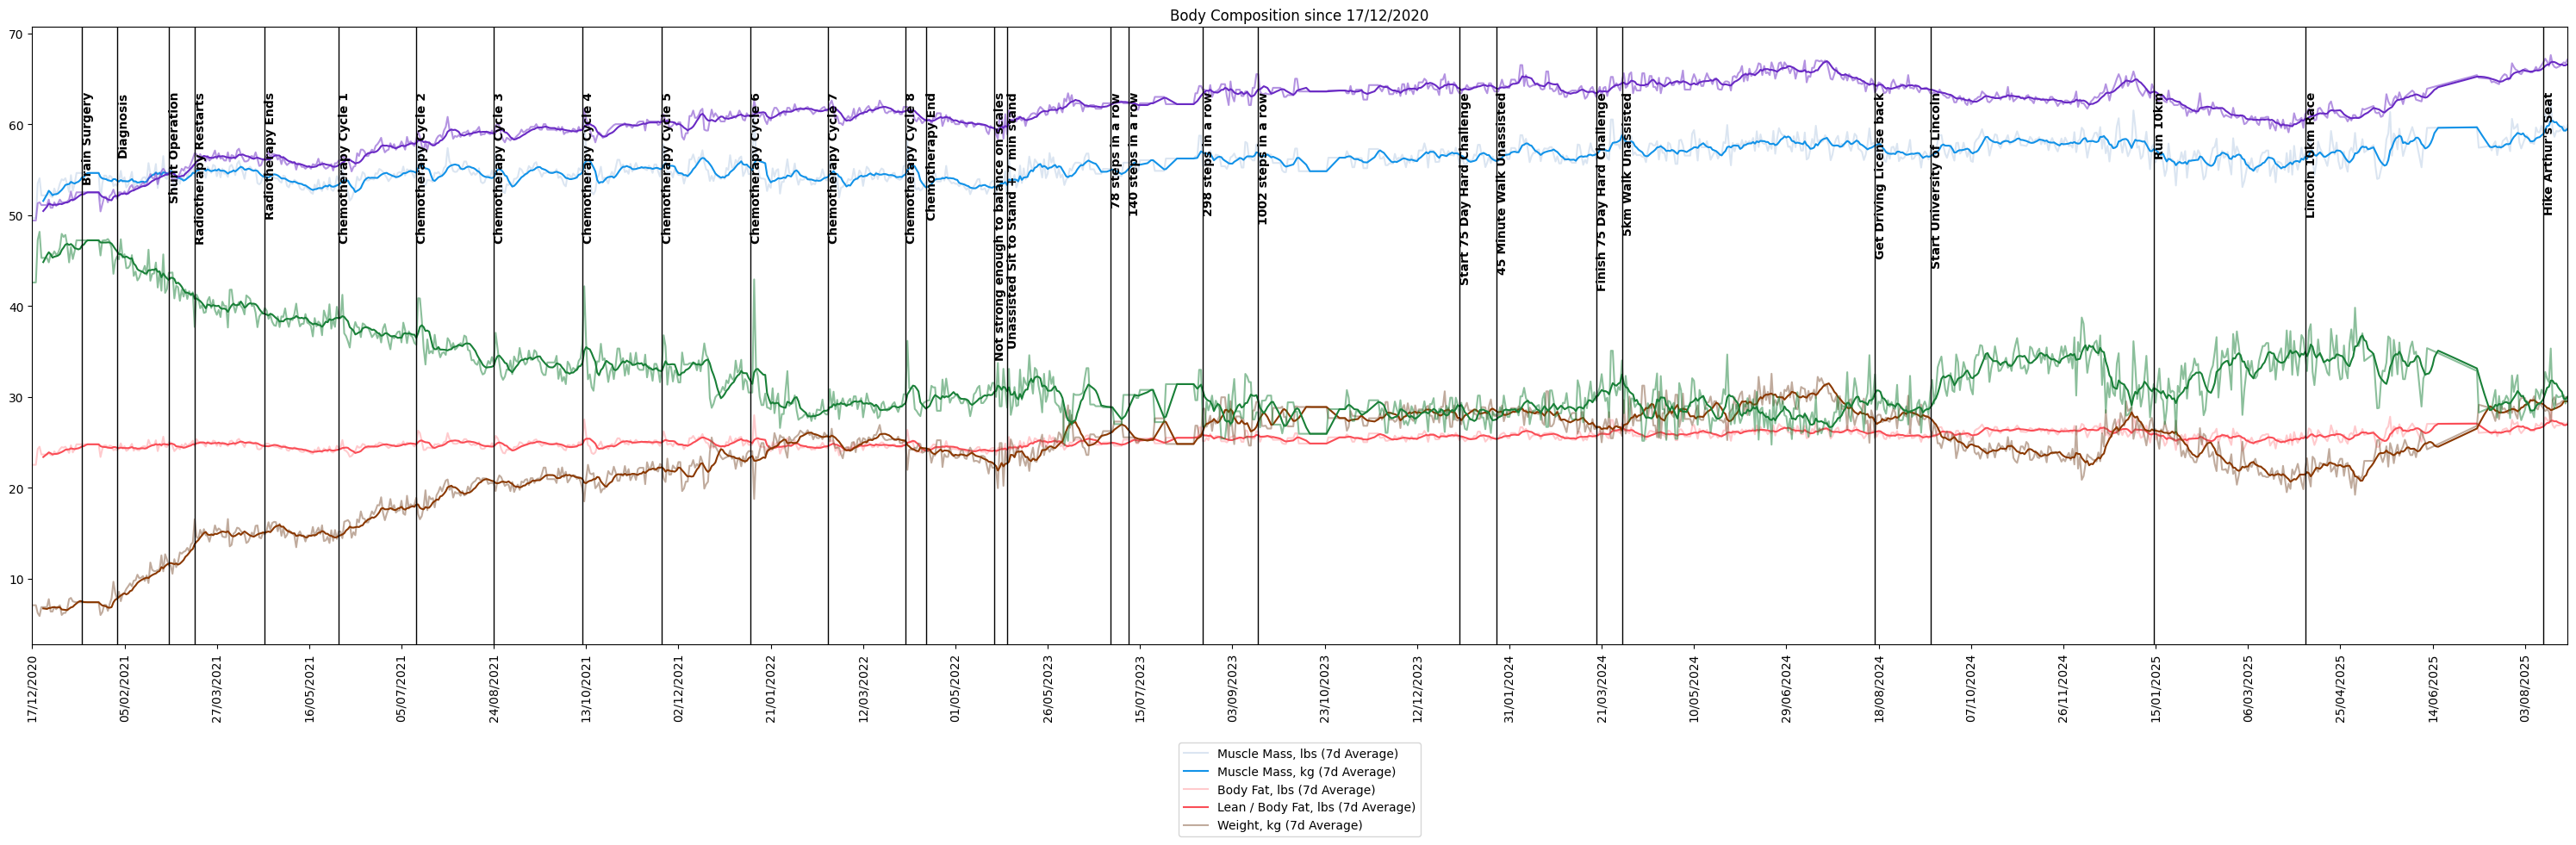

In [ ]:
figure, ax = plt.subplots(figsize=(30, 10))

x_values = weights_df["Date"]
ax.margins(x=0)

ax.plot(x_values, weights_df["Muscle Mass, lbs"], color="#b8cce4b2", alpha=0.5, label="Muscle Mass, lbs")
ax.plot(x_values, weights_df["Muscle Mass, lbs (7d Average)"], color="#1192e8", label="Muscle Mass, lbs (7d Average)")

ax.plot(x_values, weights_df["Muscle Mass, kg"], color="#ff979cff", alpha=0.5, label="Muscle Mass, kg")
ax.plot(x_values, weights_df["Muscle Mass, kg (7d Average)"], color="#fa4d56", label="Muscle Mass, kg (7d Average)")

ax.plot(x_values, weights_df["Body Fat, lbs"], color="#83593d", alpha=0.5, label="Body Fat, lbs")
ax.plot(x_values, weights_df["Body Fat, lbs (7d Average)"], color="#8a3800", label="Body Fat, lbs (7d Average)")

ax.plot(x_values, weights_df["Lean Weight - Body Fat, lbs"], color="#1980387F", alpha=0.5, label="Lean Weight - Body Fat, lbs")
ax.plot(x_values, weights_df["Lean Weight - Body Fat, lbs (7d Average)"], color="#198038", label="Lean Weight - Body Fat, lbs (7d Average)")

ax.plot(x_values, weights_df["Weight, kg"], color="#6a29c483", alpha=0.5, label="Weight, kg")
ax.plot(x_values, weights_df["Weight, kg (7d Average)"], color="#6929c4", label="Weight, kg (7d Average)")

tick_every_x = 50
tick_positions = x_values[::tick_every_x]

ax.set_title(f"Body Composition since {weights_df["Date"][0]}")

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation=90)

# legend and plot colours dont seem to match so chatgpt:
custom_handles = [
    Line2D([0], [0], color="#1192e8", lw=2, label="Muscle Mass (lbs, 7d Avg)"),
    Line2D([0], [0], color="#fa4d56", lw=2, label="Muscle Mass (kg, 7d Avg)"),
    Line2D([0], [0], color="#8a3800", lw=2, label="Body Fat (lbs, 7d Avg)"),
    Line2D([0], [0], color="#198038", lw=2, label="Lean Weight - Body Fat (lbs, 7d Avg)"),
    Line2D([0], [0], color="#6929c4", lw=2, label="Weight (kg, 7d Avg)"),
]

ax.legend(handles=custom_handles, 
          title="Body Composition Tracking",
          loc="upper center", 
          bbox_to_anchor=(0.5, -0.15),
          ncol=3)
# ax.legend(["Muscle Mass, lbs (7d Average)", "Muscle Mass, kg (7d Average)", "Body Fat, lbs (7d Average)", "Lean / Body Fat, lbs (7d Average)", "Weight, kg (7d Average)"], loc="upper center", bbox_to_anchor=(0.5, -0.15))

# Event dates
# ax.axvline(x=datetime(2021, 1, 10), color="black", linewidth=1)
# ax.text(datetime(2021, 1, 10), ax.get_ylim()[1] * 0.9, "Seizure", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline(x="13/01/2021", color="black", linewidth=1)
ax.text("13/01/2021", ax.get_ylim()[1] * 0.9, "Brain Surgery", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline("01/02/2021", color="black", linewidth=1)
ax.text("01/02/2021", ax.get_ylim()[1] * 0.9, "Diagnosis", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline("01/03/2021", color="black", linewidth=1)
ax.text("01/03/2021", ax.get_ylim()[1] * 0.9, "Shunt Operation", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline("15/03/2021", color="black", linewidth=1)
ax.text("15/03/2021", ax.get_ylim()[1] * 0.9, "Radiotherapy Restarts", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline("22/04/2021", color="black", linewidth=1)
ax.text("22/04/2021", ax.get_ylim()[1] * 0.9, "Radiotherapy Ends", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline("01/06/2021", color="black", linewidth=1)
ax.text("01/06/2021", ax.get_ylim()[1] * 0.9, "Chemotherapy Cycle 1", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline("13/07/2021", color="black", linewidth=1)
ax.text("13/07/2021", ax.get_ylim()[1] * 0.9, "Chemotherapy Cycle 2", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline("24/08/2021", color="black", linewidth=1)
ax.text("24/08/2021", ax.get_ylim()[1] * 0.9, "Chemotherapy Cycle 3", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline("11/10/2021", color="black", linewidth=1)
ax.text("11/10/2021", ax.get_ylim()[1] * 0.9, "Chemotherapy Cycle 4", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline("23/11/2021", color="black", linewidth=1)
ax.text("23/11/2021", ax.get_ylim()[1] * 0.9, "Chemotherapy Cycle 5", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline("10/01/2022", color="black", linewidth=1)
ax.text("10/01/2022", ax.get_ylim()[1] * 0.9, "Chemotherapy Cycle 6", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline("21/02/2022", color="black", linewidth=1)
ax.text("21/02/2022", ax.get_ylim()[1] * 0.9, "Chemotherapy Cycle 7", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline("04/04/2022", color="black", linewidth=1)
ax.text("04/04/2022", ax.get_ylim()[1] * 0.9, "Chemotherapy Cycle 8", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline("15/04/2022", color="black", linewidth=1)
ax.text("15/04/2022", ax.get_ylim()[1] * 0.9, "Chemotherapy End", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline("26/05/2022", color="black", linewidth=1)
ax.text("26/05/2022", ax.get_ylim()[1] * 0.9, "Not strong enough to balance on scales", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline("12/01/2023", color="black", linewidth=1) # This actually occurred on 06/01/2023, but because I have no data for that date, it is being incorrectly plotted. The easiest fix was to shift the line by 6 days
ax.text("12/01/2023", ax.get_ylim()[1] * 0.9, "Unassisted Sit to Stand + 7 min stand", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

# ax.axvline("08/02/2023", color="black", linewidth=1) # Again, because I have no data for 08/02/2023, I cannot plot the line on that date. I've chosen to remove this line
# ax.text("08/02/2023", ax.get_ylim()[1] * 0.9, "23 steps in a row", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline("29/06/2023", color="black", linewidth=1)
ax.text("29/06/2023", ax.get_ylim()[1] * 0.9, "78 steps in a row", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline("09/07/2023", color="black", linewidth=1)
ax.text("09/07/2023", ax.get_ylim()[1] * 0.9, "140 steps in a row", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline("18/08/2023", color="black", linewidth=1)
ax.text("18/08/2023", ax.get_ylim()[1] * 0.9, "298 steps in a row", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline("17/09/2023", color="black", linewidth=1)
ax.text("17/09/2023", ax.get_ylim()[1] * 0.9, "1002 steps in a row", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline("04/01/2024", color="black", linewidth=1)
ax.text("04/01/2024", ax.get_ylim()[1] * 0.9, "Start 75 Day Hard Challenge", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline("24/01/2024", color="black", linewidth=1)
ax.text("24/01/2024", ax.get_ylim()[1] * 0.9, "45 Minute Walk Unassisted", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline("18/03/2024", color="black", linewidth=1)
ax.text("18/03/2024", ax.get_ylim()[1] * 0.9, "Finish 75 Day Hard Challenge", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline("01/04/2024", color="black", linewidth=1)
ax.text("01/04/2024", ax.get_ylim()[1] * 0.9, "5km Walk Unassisted", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline("16/08/2024", color="black", linewidth=1)
ax.text("16/08/2024", ax.get_ylim()[1] * 0.9, "Get Driving License back", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline("15/09/2024", color="black", linewidth=1)
ax.text("15/09/2024", ax.get_ylim()[1] * 0.9, "Start University of Lincoln", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline("14/01/2025", color="black", linewidth=1)
ax.text("14/01/2025", ax.get_ylim()[1] * 0.9, "Run 10km", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline("06/04/2025", color="black", linewidth=1)
ax.text("06/04/2025", ax.get_ylim()[1] * 0.9, "Lincoln 10km Race", rotation=90, verticalalignment="top", color="Black", fontweight="bold")

ax.axvline("13/08/2025", color="black", linewidth=1)
ax.text("13/08/2025", ax.get_ylim()[1] * 0.9, "Hike Arthur's Seat", rotation=90, verticalalignment="top", color="Black", fontweight="bold")


figure.tight_layout()
figure.savefig("./Charts/Cancer Journey Body Composition.png", dpi=500, bbox_inches="tight")

In [78]:
weights_df

,Date,"Weight, kg",BMI,Body Fat Percentage,Muscle Percentage,RMI,Visceral Fat Percentage,Calories In,"Body Fat, kg","Muscle Mass, kg",...,"Weight, lbs","Muscle Mass, lbs","Body Fat, lbs","Lean Weight - Body Fat, lbs","Body Fat, kg (7d Average)","Body Fat, lbs (7d Average)","Muscle Mass, kg (7d Average)","Muscle Mass, lbs (7d Average)","Lean Weight - Body Fat, lbs (7d Average)","Weight, kg (7d Average)"
0,17/12/2020,49.4,16.7,6.5,45.6,1359.0,1.0,1500.0,3.2110,22.5264,...,108.908358,49.662211,7.079043,42.583168,NaN,NaN,NaN,NaN,NaN,NaN
1,18/12/2020,49.4,16.7,6.5,45.6,1359.0,1.0,1500.0,3.2110,22.5264,...,108.908358,49.662211,7.079043,42.583168,NaN,NaN,NaN,NaN,NaN,NaN
2,19/12/2020,49.4,16.7,6.5,45.6,1359.0,1.0,1500.0,3.2110,22.5264,...,108.908358,49.662211,7.079043,42.583168,NaN,NaN,NaN,NaN,NaN,NaN
3,20/12/2020,51.3,17.2,5.5,47.3,1383.0,1.0,1500.0,2.8215,24.2649,...,113.097140,53.494947,6.220343,47.274605,NaN,NaN,NaN,NaN,NaN,NaN
4,21/12/2020,51.4,17.2,5.2,47.7,1388.0,1.0,600.0,2.6728,24.5178,...,113.317603,54.052497,5.892515,48.159981,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,22/08/2025,66.4,22.4,20.0,40.5,1610.0,5.0,2517.0,13.2800,26.8920,...,146.386942,59.286712,29.277388,30.009323,13.144414,28.978473,27.104200,59.754532,30.776059,66.542857
1370,23/08/2025,66.6,22.5,20.1,40.6,1613.0,5.0,2453.0,13.3866,27.0396,...,146.827867,59.612114,29.512401,30.099713,13.216557,29.137521,27.077857,59.696456,30.558936,66.571429
1371,24/08/2025,66.8,22.6,20.1,40.6,1617.0,5.0,2910.0,13.4268,27.1208,...,147.268791,59.791129,29.601027,30.190102,13.367414,29.470104,26.896257,59.296097,29.825993,66.457143
1372,25/08/2025,66.7,22.5,20.4,40.3,1614.0,5.0,2898.0,13.6068,26.8801,...,147.048329,59.260477,29.997859,29.262617,13.389357,29.518480,26.892500,59.287814,29.769334,66.471429
